# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

# Instalacion de librerias 
- pip install pandas matprotlib


## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



### Punto 1 
Se importa pandas, luego se utiliza la funcion read_csv para importar el archivo y guardarlo en un dataframe para poder leer sus datos 

In [99]:
import pandas as pd 

df = pd.read_csv("datasets_calificaciones.csv")

### Punto 2 
- Se utiliza el metodo .head() para poder visualizar las primeras filas del dataframe 
- Se utiliza el metodo .info() para poder ver los tipos de datos y los cuantos valores no nulos contiene cada columna
- Se utiliza el metodo .describe() para obtener un analisis estaditico de las columnas numericas 



In [100]:
df.head(20)


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%
5,javier soto,fisica,5.8,6.5,6,80%
6,sofia díaz,ciencias sociales,9.5,9.1,,98%
7,miguel fernández,literatura universal,8,7.8,8.2,85%
8,valentina ruiz,matematicas,7,,7.8,90%
9,diego castro,fisica,6.8,7.2,7.5,93%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [7]:
df.describe()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
count,100,100,95,90,89,100
unique,96,7,49,45,46,35
top,mateo díaz,matematicas,,7.5,9.5,99%
freq,2,25,7,5,4,5


### Punto 3 
- Utilizamos el metodos isnull().sum() para saber cuantos valores hay por columna 
- utilizamos .to_numeric() para convertir parcial 1 y 2 , final y asistencia a numerico 
- utilizamos .replace() para eliminar los signos de porcentajes de los valores de asistencia, para luego convertirlo a nuemericos con .to_numeric()
- se utiliza el metodo .fillna para rellanar los valores nulos, se remplazo con un valor promedio .mean() de cada columna de parcial 1 y 2 y final, y el inplace true para que se modifique en la tabla original
- utilizamos un condicional para ver cuantas filas en la columna presentaban el valor atipico del porcentaje mayor a 100 y se los reemplazo por 100.  
- se capitalizo las columnas de estudiante y materia con los metodos de str tales como .title() para pasar a mayusculas la primera letra de cada palabra y .stip() para eliminar los espacios en blancos 

In [101]:
df.isnull().sum()


estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

In [102]:
df["Parcial 1"] = pd.to_numeric(df["Parcial 1"], errors="coerce")
df["Parcial 2"] = pd.to_numeric(df["Parcial 2"], errors="coerce")
df["Final"] = pd.to_numeric(df["Final"], errors="coerce")
df.head(15)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,NaN,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,NaN,9.2,8.5,92%
5,javier soto,fisica,5.8,6.5,6.0,80%
6,sofia díaz,ciencias sociales,9.5,9.1,NaN,98%
7,miguel fernández,literatura universal,8.0,7.8,8.2,85%
8,valentina ruiz,matematicas,7.0,NaN,7.8,90%
9,diego castro,fisica,6.8,7.2,7.5,93%


In [107]:
df["Asistencia"] = df["Asistencia"].replace("[\%]", "", regex=True)
df["Asistencia"] = pd.to_numeric(df["Asistencia"], errors="coerce")
df.loc[df["Asistencia"] > 100, "Asistencia"]= 100
df.head(30)
 

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_13900\3131775623.py:1: SyntaxWarning: invalid escape sequence '\%'
  df["Asistencia"] = df["Asistencia"].replace("[\%]", "", regex=True)


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.00,7.50,9.00,95
1,Carlos López,Fisica,6.20,7.00,7.89,88
2,María Gómez,Quimica,9.00,8.80,9.50,100
3,Pedro Rodríguez,Historia,7.50,6.00,7.00,75
4,Laura Vargas,Matematicas,7.83,9.20,8.50,92
5,Javier Soto,Fisica,5.80,6.50,6.00,80
6,Sofia Díaz,Ciencias Sociales,9.50,9.10,7.89,98
7,Miguel Fernández,Literatura Universal,8.00,7.80,8.20,85
8,Valentina Ruiz,Matematicas,7.00,7.83,7.80,90
9,Diego Castro,Fisica,6.80,7.20,7.50,93


In [108]:
df["Parcial 1"].fillna(df["Parcial 1"].mean(), inplace= True)
df["Parcial 1"] = df["Parcial 1"].round(2)

df["Parcial 2"].fillna(df["Parcial 2"].mean(), inplace= True)
df["Parcial 2"] = df["Parcial 2"].round(2)

df["Final"].fillna(df["Final"].mean(), inplace= True)
df["Final"] = df["Final"].round(2)

df.head(15)


C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_13900\3543347877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Parcial 1"].fillna(df["Parcial 1"].mean(), inplace= True)
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_13900\3543347877.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.00,7.50,9.00,95
1,Carlos López,Fisica,6.20,7.00,7.89,88
2,María Gómez,Quimica,9.00,8.80,9.50,100
3,Pedro Rodríguez,Historia,7.50,6.00,7.00,75
4,Laura Vargas,Matematicas,7.83,9.20,8.50,92
5,Javier Soto,Fisica,5.80,6.50,6.00,80
6,Sofia Díaz,Ciencias Sociales,9.50,9.10,7.89,98
7,Miguel Fernández,Literatura Universal,8.00,7.80,8.20,85
8,Valentina Ruiz,Matematicas,7.00,7.83,7.80,90
9,Diego Castro,Fisica,6.80,7.20,7.50,93


In [110]:
df["estudiante"] = df["estudiante"].astype(str).str.title().str.strip()
df["Materia"] = df["Materia"].astype(str).str.title().str.strip()
df.head(20)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.00,7.50,9.00,95
1,Carlos López,Fisica,6.20,7.00,7.89,88
2,María Gómez,Quimica,9.00,8.80,9.50,100
3,Pedro Rodríguez,Historia,7.50,6.00,7.00,75
4,Laura Vargas,Matematicas,7.83,9.20,8.50,92
5,Javier Soto,Fisica,5.80,6.50,6.00,80
6,Sofia Díaz,Ciencias Sociales,9.50,9.10,7.89,98
7,Miguel Fernández,Literatura Universal,8.00,7.80,8.20,85
8,Valentina Ruiz,Matematicas,7.00,7.83,7.80,90
9,Diego Castro,Fisica,6.80,7.20,7.50,93


### Punto 4 
- se utiliza el metodo .describe() nuevamente para sacar estadisticas sobre las columnas que son de tipo numerico(parcial 1 y 2, final y asistencia)
- se utiliza el .groupby() para agrupar por materia y ver el promedio de sus notas finales y promedia de asistencia por materia

In [112]:
df.isnull().sum()

estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64

In [113]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,100.000000,100.00000,100.000000,100.000000
mean,7.831600,7.83060,7.893500,88.180000
std,1.134184,1.10895,1.111134,8.445165
min,5.500000,5.80000,5.700000,70.000000
25%,7.075000,6.97500,7.100000,81.750000
50%,7.830000,7.83000,7.890000,88.500000
75%,8.800000,8.80000,8.825000,96.000000
max,9.900000,9.90000,9.900000,100.000000


In [115]:
df.groupby("Materia")["Final"].mean()

Materia
Ciencias Sociales       7.890000
Fisica                  6.624583
Historia                7.481667
Literatura Universal    8.200000
Matematicas             8.470400
Programacion Basica     6.300000
Quimica                 9.027083
Name: Final, dtype: float64

In [119]:
df.groupby("Materia")["Asistencia"].mean()

Materia
Ciencias Sociales       98.000000
Fisica                  82.208333
Historia                80.083333
Literatura Universal    85.000000
Matematicas             92.680000
Programacion Basica     82.000000
Quimica                 97.541667
Name: Asistencia, dtype: float64

### Punto 5 
- importamos la libreria matplotlib y se le asigana el alia plt, para la generacion de graficos usamos pyplot
- se creo un grafico de barras para representar el promedio de nota final por materia usando el .bar()
- se creo un histograma para representar la distrubucion de notas del primer parcial con .hist()
- se creo un grafico de dispersion para ver la comparativa de las variables de asistencia y notas final .scatter()


In [124]:
import matplotlib.pyplot as plt

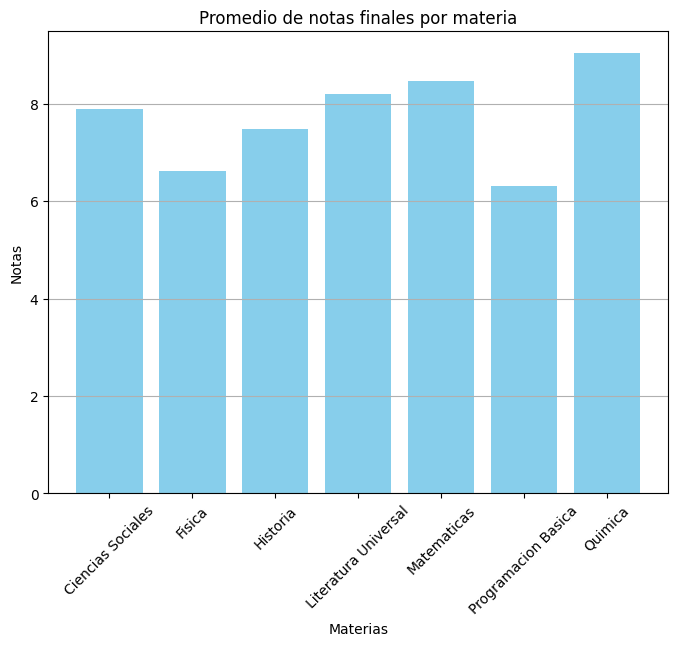

In [ ]:
materia_por_final = df.groupby("Materia")["Final"].mean()

plt.figure(figsize=(8, 6))  
plt.bar(materia_por_final.index, materia_por_final.values, color="skyblue")
plt.title("Promedio de notas finales por materia")
plt.xlabel("Materias")
plt.ylabel("Notas")
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()


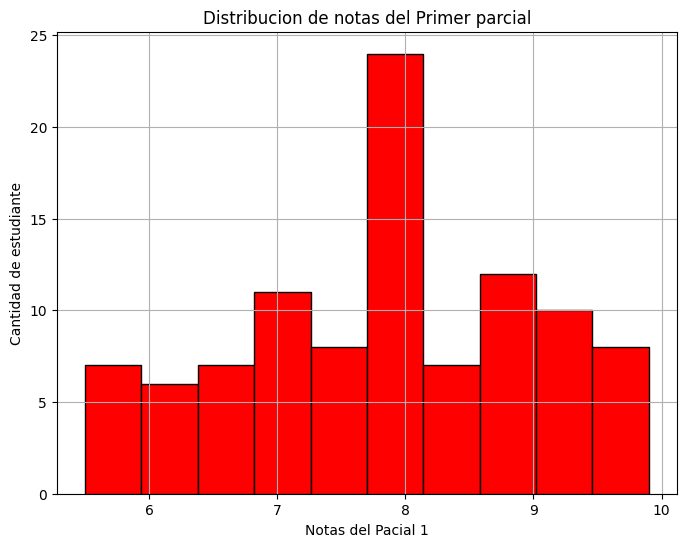

In [145]:
plt.figure( figsize=(8, 6))
plt.hist(df["Parcial 1"], color= "red", bins=10,  edgecolor=  "black")
plt.title("Distribucion de notas del Primer parcial")
plt.xlabel("Notas del Pacial 1")
plt.ylabel("Cantidad de estudiante")
plt.grid(True)
plt.show()

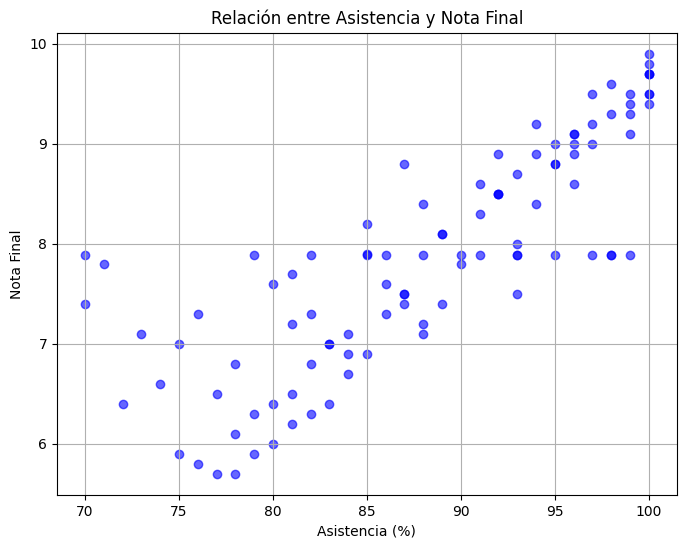

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Asistencia"], df["Final"], color="blue", alpha=0.6)
plt.title("Relación entre Asistencia y Nota Final")
plt.xlabel("Asistencia (%)")
plt.ylabel("Nota Final")
plt.grid(True)
plt.show()

### Punto 6 
- se importa la libreria sqlite3 
- se crea una conexion a una base de datos nueva "Calificaciones.db" 
- se guarda el dataframe a una tabla de la base de datos llamada "estudiante_calificaciones"

In [147]:
import sqlite3

conn = sqlite3.connect("Calificaciones.db")

df.to_sql("estudiante_calificaciones",conn, index=False)

conn.close()